# X-Ray Image Classification Project

Phase 4 Project by Bella Scribner
- Flex
- Instructor: Morgan Jones
- Bog: https://datascienceprojectsandmore.blogspot.com/
- Date of Review: Monday, March 11th 2024

# Abstract

This project creates a model that predicts if a patient has pneumonia or not, using pediatric chest x-ray images.  Each year, pneumonia is the cause of death for approximately 725,000 children under the age of 5 worldwide, largely impacting communities that do not have a robust health care system (namely southern Asia and sub-Saharan Africa).  Companies like [Neuro Labs Africa](https://neurallabs.africa/#) are working in conjunction with [UNICEF](https://www.unicefventurefund.org/story/neural-labs-using-ai-accelerate-medical-imaging-diagnosis-respiratory-diseases) to help increase access to healthcare, provide real time diagnoses of pneumonia (and other diseases), and ultimately decrease the number of deaths caused by this very treatable illness.  This project proposes a business with similar goals, one aiming to expand health care access and help identify patients with pneumonia. 

This project goes through a model iteration process, starting with a very basic densely connected neural network, next trying a convolutional neural network – both with and without regularization – and ending with a model that utilizes transfer learning.  The project finds that the CNN with regularization is the most performant model, based on validation metrics, including accuracy, recall, precision and F1 score, as well as considering computational time and the weight of the model.  The project evaluates the chosen final model with a holdout test set, displays a few visuals of the final model (the structure of the model as well as the activation layers), and offers a few recommendations to the proposed business. 

# Introduction

## The Business Problem

### Pneumonia

Pneumonia is the cause of death for over 725,000 children under the age of 5 worldwide, of which around 190,000 are newborns ([World Health Organization](https://www.who.int/news-room/fact-sheets/detail/pneumonia) and [UNICEF](https://www.unicef.org/stories/childhood-pneumonia-explained)). There are many kinds of pneumonia -- bacterial, fungal, and viral -- but ultimately it is an infection of the lungs where the alveoli (the small sacks at the end of the bronchiole) fill up with pus and fluid making breathing painful and limiting oxygen intake.  As the most common type of pneumonia infection is bacterial, treatment is often as easy as taking a round of antibiotics.  For more severe cases of pneumonia that require hospitalization, oxygen is supplied to the patient if available.

One of the most common ways to diagnosis if a patient has contracted pneumonia is to examine a chest x-ray, looking for white spots in the lungs (called infiltrates) ([RadiologyInfo.org](https://www.radiologyinfo.org/en/info/pneumonia#:~:text=When%20interpreting%20the%20x%2Dray,(fluid%20surrounding%20the%20lungs).)).  Examining these chest x-rays can also be useful in identifying if any complications related to pneumonia, such as abscesses or pleural effusions (fluid surrounding the lungs), have arisen.

A vast majority of deaths caused by pneumonia are concentrated in the world's poorest countries (southern Asia and sub-Saharan Africa), where there is a lack of robust health care systems. This includes a shortage of doctors and lack of access to x-rays and labs. This lack of a health care system is one of the main reasons that pneumonia kills so many children even when the treatment is known and easy to administer. 

![bronciole picture](images/bronchi_lungs.jpg)

### UNICEF and Neural Labs Africa

UNICEF is actively working to fight the number of deaths by pneumonia.  One of the ways they are doing this is through their [Venture Fund](https://www.unicef.org/innovation/venturefund/ai-ds-learning-health-cohort) which invests in many different machine learning focused companies that are working to improve health care services.  One such company is [Neural Labs Africa](https://neurallabs.africa/#) (see also [UNICEF Neural Labs Africa](https://www.unicefventurefund.org/story/neural-labs-using-ai-accelerate-medical-imaging-diagnosis-respiratory-diseases)).  Neural Labs Africa is working to leverage AI to "democratize access to diagnostic healthcare" and improve patient care. Their product NeuralSight for Chest Imaging is capable of identifying, labeling and highlighting over 20 respiratory diseases, including pneumonia.  

While what Neural Labs Africa is accomplishing is widely outside the scope of this project, it does serve as the inspiration.  The idea of expanding health care to areas that most need it through machine learning by offering real time diagnoses from a simple x-ray image.  

A crucial note while considering both this project, as well as utilizing AI on a broader scale to improve health care worldwide, is that access to resources is not guaranteed.  Those areas of the world that are most affected by pneumonia do not have access to x-ray technology which puts a limit on how useful products like NeuralSight, or the below proposed project can be.   

It is imperative that access to basic health care services, including mobile x-ray machines, improves.  Only then can predictive models like these really make an impact in suffering communities -- even if access to a doctor or hospital is not available (or easily attainable).  That is when we will see these real time diagnoses be truly impactful in saving lives.

### This Project | The Business + Business Problem

As mentioned above, Neural Labs Africa working with UNICEF is the inspiration for this project.  We will posit a non-for-profit organization, looking to expand access of health care as the business.  The project is to create a model that will predict whether or not a patient has pneumonia based on their x-ray.  The idea is that patients in rural areas, or areas with limited access to hospitals and doctors (but have access to a mobile x-ray machine more locally) can utilize this to achieve real-time diagnoses, and those patients that have pneumonia can make next steps to get care.   

It is important that we capture as many patients as possible with pneumonia to prevent deaths.  However, placing an undue burden on patients who are not sick must also be avoided whenever possible.  Keeping in mind that we are targeting people who do not have health care resources readily available, the assumption is that taking steps to get care will be quite arduous.  Thus, the goal is to achieve both accurate and precise predictions.  


## The Data Source

The data for this project is sourced from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).  The chest x-rays themselves were “selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzou.”  The radiographs were screened for quality control. 

**If reproducing this project from GitHub:**   

The original data source had a different percentage of images in the train and validate folders.  Some prep work has already been done to move a percentage of pictures from the train set into the validation set to create more of an 80/10/10 split between the train/validation/test sets.   

**If reproducing this project via Google CoLab:** 

Please see directions on how to download and prepare the data on the document labeled [google_colab_setup](https://github.com/Bella3s/xray_image_classification/blob/main/google_colab_setup.ipynb).  This document goes through the directions and cells to download the Kaggle data and move a percentage of the train images into the validation set to achieve an approximate 80/10/10 split between the train/validation/test sets. 

In [145]:
import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

import numpy as np
np.random.seed(88)

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

import tensorflow as tf
tf.random.set_seed(88)

from sklearn.metrics import confusion_matrix

import time
import math
import pandas as pd

In [2]:
# Versions
import sys
import matplotlib
import keras
import sklearn
print('Versions of all libraries:')
print('\tPython | ',sys.version[:5])
print('\tNumpy |', np.__version__)
print('\tMatplotlib | ', matplotlib.__version__)
print('\tSeaborn | ', sns.__version__)
print('\tKeras | ', keras.__version__)
print('\tTensorflow | ', tf.__version__)
print('\tScikit-Learn | ', sklearn.__version__)

Versions of all libraries:
	Python |  3.8.5
	Numpy | 1.18.5
	Matplotlib |  3.3.1
	Seaborn |  0.11.0
	Keras |  2.4.3
	Tensorflow |  2.3.1
	Scikit-Learn |  1.3.2


# Data Exploration

## The overview
As mentioned above, the initial exploration of the data lead to the discovery that the original downloaded data had a split of approximately 79% in the training folder, 1% in the validation folder, and 10% in the test folder.  Some work was done in preparation of the exploration below to achieve a more standard 80/10/10 split.  

In exploring the data, we can see that it is already sorted into train, validation, and test folders, each of which have two folders containing images of pediatric chest x-rays – one folder contains images where pneumonia is present (“PNEUMONIA”) and the other contains images where pneumonia is not present (“NORMAL”). 

We also find that there is quite an imbalance in our target distribution, with only 23% of the training images being Normal, and 77% being x-rays with pneumonia present.  With image processing, we will be using Neural Networks.  The hope is that these complex models will be able to overcome this imbalance. However, if we find that we need to simplify our model, or our final model is not overcoming this challenge of imbalance, we may have to circle back to this imbalance in the data itself and run through our project process again. 

In the last section of our exploration, we look at some of the images themselves.  See below for some images of both pneumonia and normal x-rays, as well as a histogram of pixel distribution for the first normal and pneumonia images.  We can see from the pixel distribution that the x-ray with pneumonia present is much lighter.  Conceptually, we believe this is because of the infiltrates the x-ray is picking up (the white spots in the lungs that indicate pneumonia is present).  However, we can see from the first 8 images previewed that quality of the x-ray itself may play a bigger role than we would hope in regard to pixel distribution and how bright or dark these images are. 

## Detailed exploration

Now that we have read through the overview, see below for the code and pictures of our data!  

In [3]:
# View Structure of Data
print('chest_xray folder:', os.listdir('./chest_xray'))

# View structure of train folder
print('chest_xray/train folder:', os.listdir('./chest_xray/train'))

chest_xray folder: ['chest_xray', 'test', 'train', 'val', '__MACOSX']
chest_xray/train folder: ['NORMAL', 'PNEUMONIA']


In [4]:
# Take a peek at the number of images in each folder

# Number of images in train/normal and train/pneumonia
len_normal_train = len(os.listdir('./chest_xray/train/NORMAL'))
len_pneu_train = len(os.listdir('./chest_xray/train/PNEUMONIA'))
len_total_train = len_normal_train + len_pneu_train

# Number of images in val/normal and val/pneumonia
len_normal_val = len(os.listdir('./chest_xray/val/NORMAL'))
len_pneu_val = len(os.listdir('./chest_xray/val/PNEUMONIA'))
len_total_val = len_normal_val + len_pneu_val

# Number of images in test/normal and test/pneumonia
len_normal_test = len(os.listdir('./chest_xray/test/NORMAL'))
len_pneu_test = len(os.listdir('./chest_xray/test/PNEUMONIA'))
len_total_test = len_normal_test + len_pneu_test

print("There are", len_total_train, "images total in the training set.")
print("There are", len_total_val, "images total in the validation set.")
print("There are", len_total_test, "images total in the test set.\n")

# Total number of images
num_images_total = len_total_train + len_total_val + len_total_test

print('Using {}% of data to train.'.format(round(len_total_train / num_images_total *100,2)))
print('Using {}% of data to validate.'.format(round(len_total_val / num_images_total *100,2)))
print('Using {}% of data to test.'.format(round(len_total_test / num_images_total *100,2)))

There are 4696 images total in the training set.
There are 536 images total in the validation set.
There are 624 images total in the test set.

Using 80.19% of data to train
Using 9.15% of data to validate
Using 10.66% of data to test


In [5]:
# Look at the distribution of the target

print('Target Distributon:')
print('{}% normal'.format(round(len_normal_train/len_total_train * 100, 2)))
print('{}% pneumonia'.format(round(len_pneu_train/len_total_train * 100, 2)))

Target Distributon:
23.02% normal
76.98% pneumonia


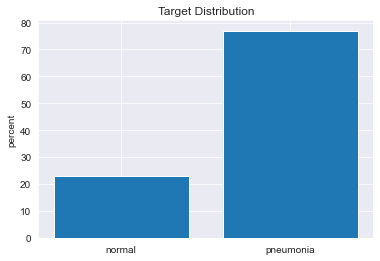

In [69]:
# Visualize distribution of target

plt.bar(['normal', 'pneumonia'], [23.02, 76.98])
plt.title('Target Distribution')
plt.ylabel('percent')
plt.grid('True');

We can see that we have just under 4,700 images to train our model with, about 500 to validate with, and about 600 to test our final model with.  This is an approximate 80/10/10 percent split of our data between the three groups, which is common practice.  

 Furthermore, we can see that there is an imbalance in our target distribution in our training data, with about 77% in the pneumonia class, and only 23% in the normal class.  For this project, we will move forward with the assumption that this imbalance will affect our training process, but that the complexity of a neural network will be able to work around it.  

*(Note, it is not where this project ended up, but if I were to start over again, I would most likely downsample the pneumonia training data to create more of a balanced training set.  If you are running this project, I would highly recommend trying this or generating more data in the normal class to create a more balanced training set).* 

In [6]:
# Take a Look at some Images

# The directories of the folders
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# All images will be rescaled by 1./225
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators with flow_from_directory()
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # resize images down to 150x150
                                                    target_size=(150,150),
                                                    # process in 587 batches
                                                    batch_size=8,
                                                    # target is binary
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150,150),
                                                batch_size=8,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=8,
                                                  class_mode='binary')

Found 4696 images belonging to 2 classes.
Found 536 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
# Create a data sets

# Images list will hold the arrays of each image (processed in batches, 8 images per batch)
# Labels list will hold the corresponding label (processed in batches, 8 labels per batch)
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

start_time = time.time()

# Process the train images
for batch in range(587):
    # 8 image arrays and 8 labels assigned to variables
    train_i, train_l = next(train_generator)
    # append 8 images to dataset
    train_images.append(train_i)
    # append 8 labels to train_label
    train_labels.append(train_l)
    
# Process validation images + labels
for batch in range(67):
    val_i, val_l = next(val_generator)
    val_images.append(val_i)
    val_labels.append(val_l)
    
# Process test images + labels
for batch in range(78):
    test_i, test_l = next(test_generator)
    test_images.append(test_i)
    test_labels.append(test_l)
    
end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Execution Time: 271


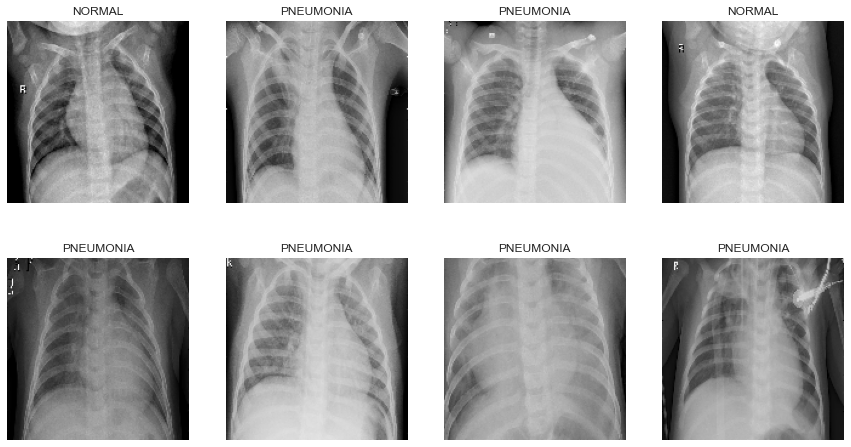

In [8]:
# View first batch of train images and their labels

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(15,8))
classes = list(train_generator.class_indices.keys())

for i in range(8):
    row = i // 4 
    col = i % 4
    ax = axes[row, col]

    ax.imshow(train_images[0][i])
    label = int(train_labels[0][i])
    ax.set_title(classes[label])
    ax.axis('off')

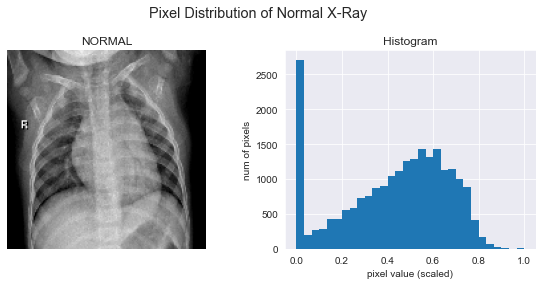

In [70]:
# Look at the distribution of pixels in each class type

norm_img = train_images[0][0]
pneu_img = train_images[0][1]

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

# Display the x-ray image
ax[0].imshow(norm_img)
ax[0].set_title('NORMAL')
ax[0].axis('off')

# Display the histogram of pixels
ax[1].hist(norm_img[:,:,0].flatten(), bins=30, lw=0)
ax[1].set_title('Histogram')
ax[1].set_xlabel('pixel value (scaled)')
ax[1].set_ylabel('num of pixels')
ax[1].grid('True')

plt.suptitle('Pixel Distribution of Normal X-Ray', fontsize='x-large')
plt.tight_layout();

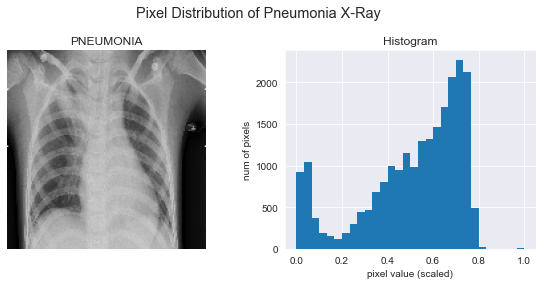

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

# Display x-ray image
ax[0].imshow(pneu_img)
ax[0].set_title('PNEUMONIA')
ax[0].axis('off')

# Display histogram of pixels
ax[1].hist(pneu_img[:,:,0].flatten(), bins=30, lw=0)
ax[1].set_title('Histogram')
ax[1].set_xlabel('pixel value (scaled)')
ax[1].set_ylabel('num of pixels')
ax[1].grid('True')

plt.suptitle('Pixel Distribution of Pneumonia X-Ray', fontsize='x-large')
plt.tight_layout();

# Model Iteration

For our model iteration, we are going to start very small and work our way to more complex from there.  The models we are going to run through are: 

1. An extremely small Neural Network, utilizing only 25% of our data.  The goal is to see what kind of results we can accomplish with a lightweight Neural Network model.  This will serve as our baseline model.
    - We will also look at how this same model structure performs wit 75% of the data as well. 
2. A Convolutional Neural Network.
3. A Convolutional Neural Network with dropout and regularization. 
4. A model that utilizes transfer learning.  We will be using TensorFlow's VGG19 as the base of our final model. 

## Baseline Model

Our baseline model will be a simple densely connected Neural Network.  We will first try this with only a small portion of our available data (25%).  We reshape the data in order to correctly feed it to the model, create and run the model, and then finally build some helper functions to create some visuals + record the evaluation metrics of all the models we run.   

In [46]:
# Look at current shapes of data
print('Train images shape:', train_images[0].shape)
print('Train labels shape:', train_labels[0].shape)
print('Validation images shape:', val_images[0].shape)
print('Validation labels shape:', val_labels[0].shape)
print('Test images shape:', test_images[0].shape)
print('Test labels shape:', test_labels[0].shape)

Train images shape: (8, 150, 150, 3)
Train labels shape: (8,)
Validation images shape: (8, 150, 150, 3)
Validation labels shape: (8,)
Test images shape: (8, 150, 150, 3)
Test labels shape: (8,)


In [47]:
# Reshape images
train_img_reshaped = train_images[0].reshape(train_images[0].shape[0],-1)
val_img_reshaped = val_images[0].reshape(val_images[0].shape[0],-1)

print(train_img_reshaped.shape)
print(val_img_reshaped.shape)

(8, 67500)
(8, 67500)


In [49]:
# Reshape Labels
train_labels_reshaped = train_labels[0].reshape(train_labels[0].shape[0],1)
val_labels_reshaped = val_labels[0].reshape(val_labels[0].shape[0],1)

print(train_labels_reshaped.shape)
print(val_labels_reshaped.shape)

(8, 1)
(8, 1)


In [50]:
# Reshape more batches and append to already reshaped arrays -- ~25% data
for i in range(1,147):
    train_img_reshaped = np.concatenate((train_img_reshaped, train_images[i].reshape(train_images[i].shape[0], -1)))
    train_labels_reshaped = np.concatenate((train_labels_reshaped, train_labels[i].reshape(train_labels[i].shape[0], -1)))
    
# Reshape all of validation data
for i in range(1,51):
    val_img_reshaped = np.concatenate((val_img_reshaped, val_images[i].reshape(val_images[i].shape[0], -1)))
    val_labels_reshaped = np.concatenate((val_labels_reshaped, val_labels[i].reshape(val_labels[i].shape[0], -1)))

In [51]:
# Build Baseline Model
baselinemodel = Sequential()

baselinemodel.add(layers.Dense(15, activation='relu', input_shape=(67500,)))
baselinemodel.add(layers.Dense(8, activation='relu'))
baselinemodel.add(layers.Dense(5, activation='relu'))

baselinemodel.add(layers.Dense(1, activation='sigmoid'))

baselinemodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                1012515   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,012,694
Trainable params: 1,012,694
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile model
baselinemodel.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy', 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.Precision()])

In [53]:
# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=8)

In [54]:
# Fit Model
start_time = time.time()
baseline_history = baselinemodel.fit(train_img_reshaped,
                                     train_labels_reshaped,
                                     epochs=40,
                                     validation_data=(val_img_reshaped, val_labels_reshaped),
                                     callbacks = [callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
37/37 [==============================] - 2s 64ms/step - loss: 0.6774 - accuracy: 0.7840 - recall: 0.9968 - precision: 0.7858 - val_loss: 0.7780 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 2/40
37/37 [==============================] - 1s 25ms/step - loss: 0.4645 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.9098 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 3/40
37/37 [==============================] - 1s 25ms/step - loss: 0.3996 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.6463 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 4/40
37/37 [==============================] - 1s 24ms/step - loss: 0.3765 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.7536 - val_accuracy: 0.4632 - val_recall: 1.0000 - val_precision: 0.4552
Epoch 5/40
37/37 [==============================] - 1s 23ms/step - loss: 0.3493 - accuracy: 0.8333 - recall:

In [55]:
def create_metric_lists(model_history, model, x_val_data, y_val_data):
    """
    This function takes in the model history, fitted model, and validation data, and outputs a list
    of training metrics, a list of validation metrics, and the confusion matrix.
    """
    # get loss, accuracy, recall, and precision -- all listed when model compiled
    train_metrics = [model_history.history[i] for i in list(model_history.history.keys())[:4]]
    val_metrics = [model_history.history[i] for i in list(model_history.history.keys())[4:]]
    
    # calculate F1 score - train
    recall = np.array(train_metrics[2])
    precision = np.array(train_metrics[3])
    f1 = 2 * ((precision * recall) / (precision + recall))
    train_metrics.append(list(f1))
    
    # calcullate F1 score - validation
    recall = np.array(val_metrics[2])
    precision = np.array(val_metrics[3])
    f1 = 2 * ((precision * recall) / (precision + recall))
    val_metrics.append(list(f1))
    
    # Confusion Matrix
    cnfs_mtrx = confusion_matrix(y_val_data, np.where(model.predict(x_val_data) >= 0.5, 1,0))
    
    return train_metrics, val_metrics, cnfs_mtrx

In [56]:
# Keep track of models + metrics for easy side-by-side comparison
all_model_metrics = {'Model': [],
                    'Loss': [],
                    'Accuracy': [],
                    'Recall': [],
                    'Precision': [],
                    'F1 Score': [],
                    'Number of Trainable Parameters' : [],
                    'Total Computation Time' : [],
                    'Number of Epochs' : []
                    'Computation Time per Epoch': [],
                    'Confusion Matrix': []}

def record_all(all_model_metrics, val_metrics, model_name, time, cnfs_mtrx, num_epochs, num_params):
    """
    This function takes in a dictionary used to record metrics for multiple models, and updates that
    dictionary with metrics from a single given model. 
    """
    
    metrics = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
    
    # Record the model name
    all_model_metrics['Model'].append(model_name)
    
    # Record the validation metrics stored in val_metrics
    for i,metric in enumerate(metrics):
        all_model_metrics[metric].append(val_metrics[i][-1])
    
    # Calculate average time per epoch
    time_per_epoch = round(time/num_epochs)
    
    # Record other data about given model
    all_model_metrics['Number of Trainable Parameters'].append(num_params)
    all_model_metrics['Total Computation Time'].append(time)
    all_model_metrics['Number of Epochs'].append(num_epochs)
    all_model_metrics['Computation Time per Epoch'].append(time_per_epoch)
    all_model_metrics['Confusion Matrix'].append(cnfs_mtrx)
    
    return all_model_metrics

In [57]:
def visualize_metrics(x, train_metrics, val_metrics, model_name, cnfs_mtrx):
    """
    -This function takes in an x (representing the number of epochs), a list of the training metrics, 
    and a list of the validation metrics.  These lists should contain a list for each metric used, specifically,
    in order, the model's loss, accuracy, recall, precision, and F1 score, per epoch.  
    -It also takes in a string of the model name used to title the visual.
    -The function outputs five graphs, one for each metric, with the training and validation data on the same axes.
    - It also takes in the confusion matrix for the model and outputs this visual as well.
    """
    
    metrics = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
    
    # Plot all metrics in above list
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,13))
    for i in range(5):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        ax.plot(x,train_metrics[i], label='Train', color='b')
        ax.plot(x, val_metrics[i], label='Validation', color='r')
        ax.set_title(metrics[i], fontsize='x-large')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metrics[i])
        ax.grid(True)
        ax.legend()
    
    #Plot the confusion matrix
    sns.heatmap(cnfs_mtrx, annot=True, ax=axes[1,2])
    axes[1,2].set_title('Confusion Matrix', fontsize='x-large')
    axes[1,2].set_xticklabels(['Normal', 'Pneumonia'])
    axes[1,2].set_yticklabels(['Normal', 'Pneumonia'])
    axes[1,2].set_xlabel('Predicted Label')
    axes[1,2].set_ylabel('True Label')
        
    plt.suptitle('{} Metrics'.format(model_name), fontsize='xx-large')
    plt.tight_layout()

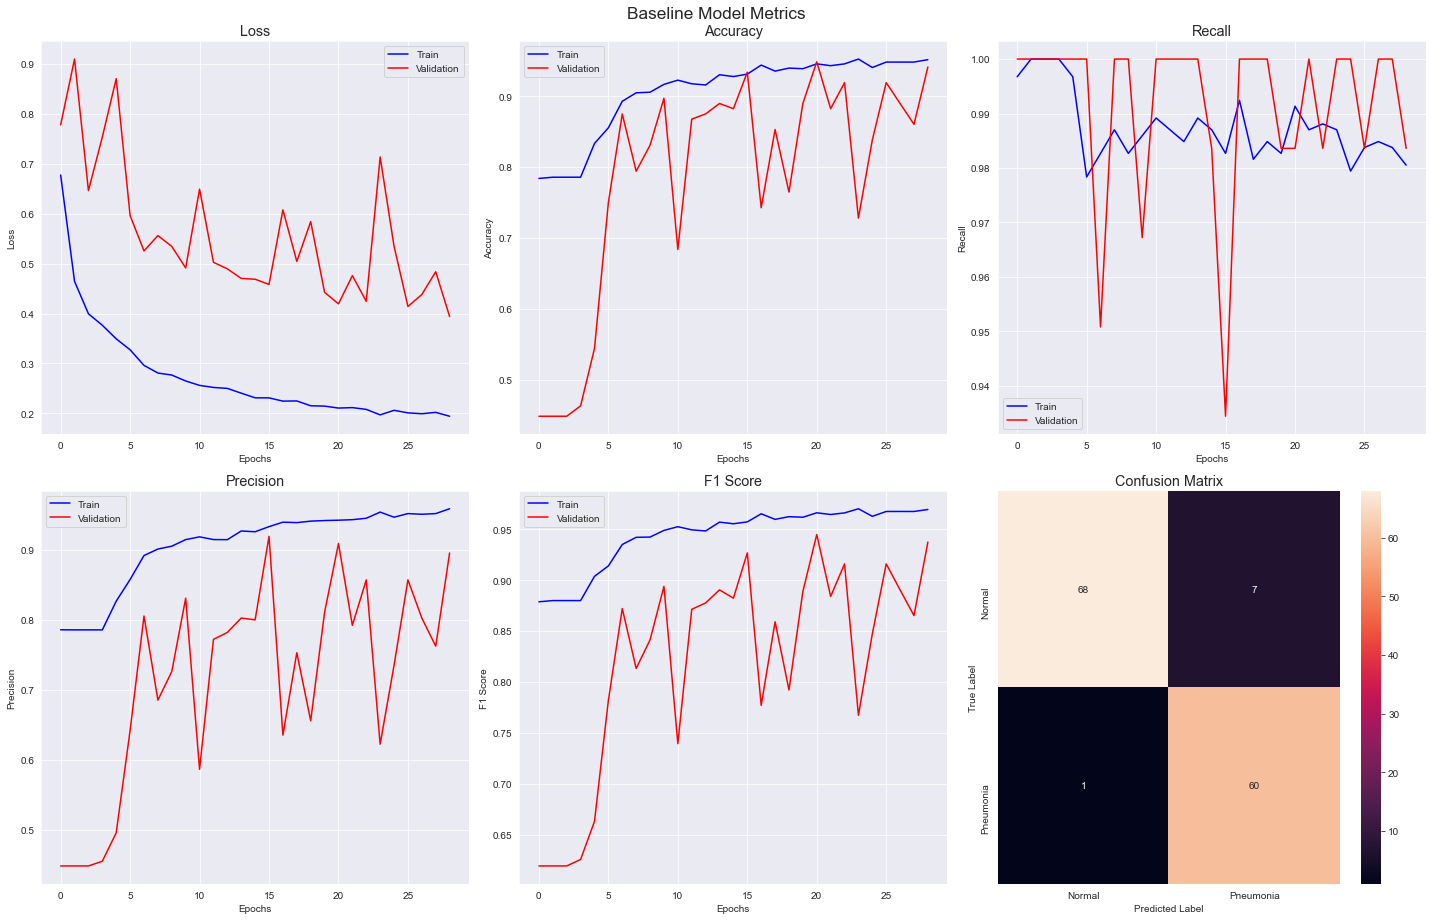

In [58]:
# Get the metrics for baseline model
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(baseline_history,
                                                            baselinemodel,
                                                            val_img_reshaped,
                                                            val_labels_reshaped)

# Record metrics in our dictionary for later comparison
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'Baseline Model', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch,
                               len(baselinemodel.trainable_weights))

# Visualize the metrics for our baseline model
visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Baseline Model', cnfs_mtrx)

With this smaller amount of data, we see that our model is performing quite well.

Before moving onto a more complex model, let’s first try this same model with more training data to see the results. 

## Baseline again, but with more data

We first need to preprocess more of the data too then feed it to the model.  Then we can rebuild and evaluate.  

In [60]:
# Reshape more batches and append to already reshaped arrays -- ~75% data
for i in range(147,441):
    train_img_reshaped = np.concatenate((train_img_reshaped, train_images[i].reshape(train_images[i].shape[0], -1)))
    train_labels_reshaped = np.concatenate((train_labels_reshaped, train_labels[i].reshape(train_labels[i].shape[0], -1)))

In [61]:
print(train_img_reshaped.shape)
print(val_img_reshaped.shape)
print(train_labels_reshaped.shape)
print(val_labels_reshaped.shape)

(3528, 67500)
(408, 67500)
(3528, 1)
(408, 1)


In [62]:
# Rebuild Model
baselinemodel_75 = Sequential()

baselinemodel_75.add(layers.Dense(15, activation='relu', input_shape=(67500,)))
baselinemodel_75.add(layers.Dense(8, activation='relu'))
baselinemodel_75.add(layers.Dense(5, activation='relu'))

baselinemodel_75.add(layers.Dense(1, activation='sigmoid'))

In [63]:
# Compile model
start_time = time.time()
baselinemodel_75.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4)
                         loss='binary_crossentropy',
                         metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=8)
# Fit Model
baseline_75_history = baselinemodel_75.fit(train_img_reshaped,
                                           train_labels_reshaped,
                                           epochs=40,
                                           batch_size=35,
                                           validation_data=(val_img_reshaped, val_labels_reshaped),
                                           callbacks=[callback])
end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
101/101 [==============================] - 4s 35ms/step - loss: 0.6918 - accuracy: 0.7664 - recall_1: 0.9890 - precision_1: 0.7727 - val_loss: 0.6932 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 2/40
101/101 [==============================] - 3s 25ms/step - loss: 0.6889 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6933 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951 accuracy: 0.7657 - recall_1: 1.0000 - p
Epoch 3/40
101/101 [==============================] - 2s 21ms/step - loss: 0.6863 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6934 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 4/40
101/101 [==============================] - 2s 24ms/step - loss: 0.6838 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6935 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 5/40
101/101 [========

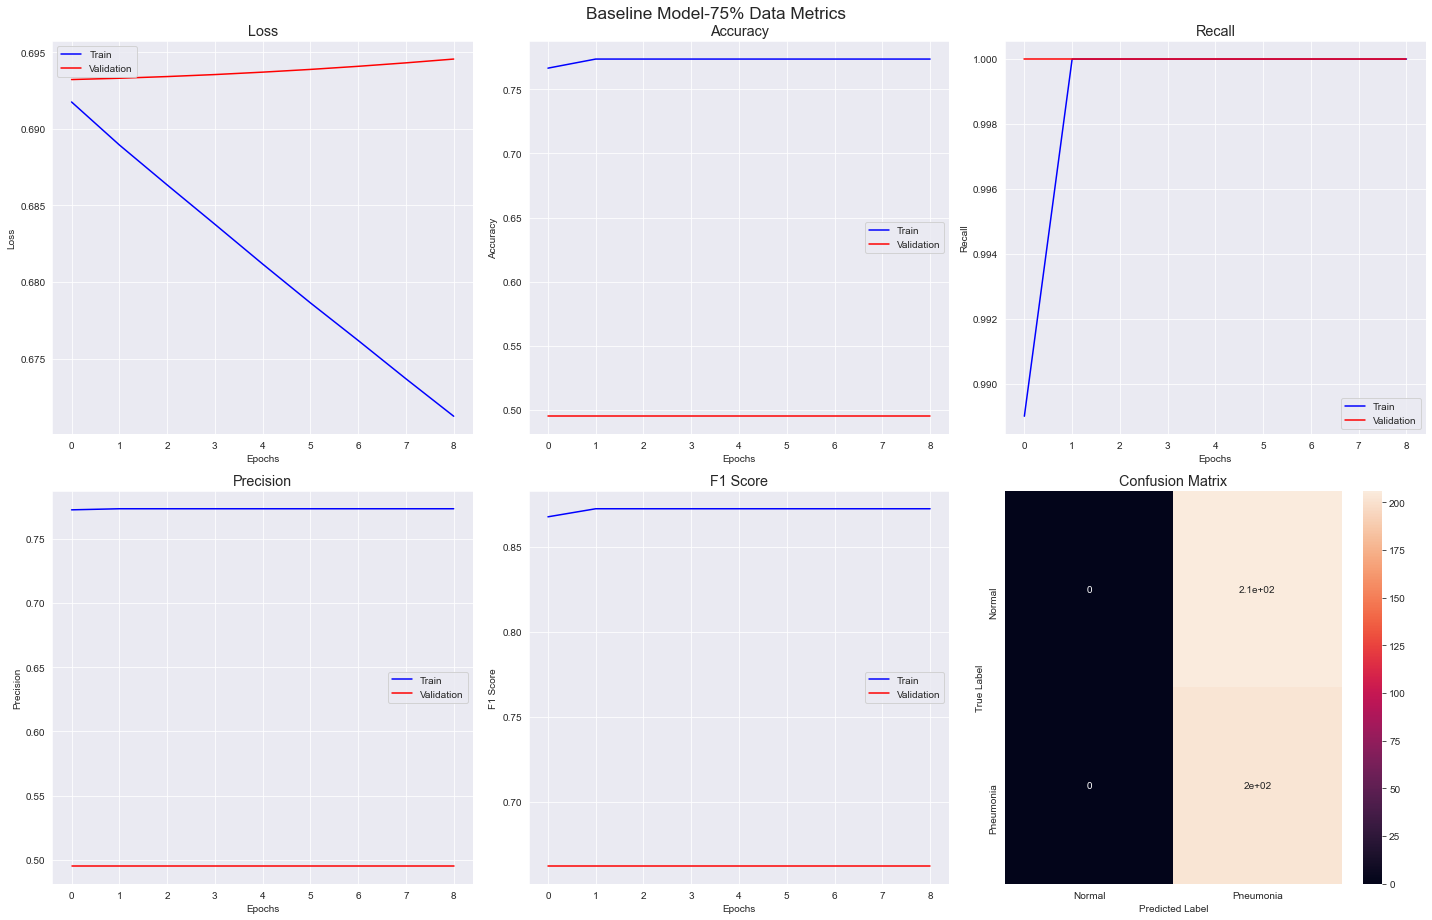

In [64]:
# Visualize Results
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(baseline_75_history,
                                                            baselinemodel_75,
                                                            val_img_reshaped,
                                                            val_labels_reshaped)

all_model_metrics = record_all(all_model_metrics, 
                               val_metrics,
                               'Baseline 75',
                               execution_time,
                               cnfs_mtrx,
                               callback.stopped_epoch,
                               len(baselinemodel_75.trainable_weights))

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Baseline Model-75% Data', cnfs_mtrx)

Very clearly, we can see this is not a good model.  It is simply predicting that every image is an x-ray with pneumonia present.  Let’s try and improve our performance by both increasing the model’s complexity and trying a convolutional neural network (rather than only a densely connected neural network), as they tend to work well when processing images.  

## Model 2

We will next try a more complex convolutional neural network.   

(Note this is still a rather small model in the grand scheme of neural network models.  In the context of both the real world and this project’s premise, we have limited resources.  We do not want to create models that will take an inane amount of computation time and energy.  Hense, the slow build up and the reason to stay as small as possible while trying to get the best possible results.) 

In [75]:
# Build the model

cnn = Sequential()

cnn.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(20, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(80, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 20)        5780      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5780)             

In [76]:
# Comiple Model
cnn.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy',
                     tf.keras.metrics.Recall(), 
                     tf.keras.metrics.Precision()])

In [77]:
start_time = time.time()

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=8)

# Train Model
cnn_history = cnn.fit(train_generator,
                      epochs=40,
                      validation_data = val_generator,
                      callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 309s 527ms/step - loss: 0.2306 - accuracy: 0.9095 - recall_2: 0.9607 - precision_2: 0.9247 - val_loss: 0.1175 - val_accuracy: 0.9534 - val_recall_2: 0.9776 - val_precision_2: 0.9324
Epoch 2/40
587/587 [==============================] - 234s 399ms/step - loss: 0.1042 - accuracy: 0.9647 - recall_2: 0.9781 - precision_2: 0.9760 - val_loss: 0.0932 - val_accuracy: 0.9571 - val_recall_2: 0.9813 - val_precision_2: 0.9359
Epoch 3/40
587/587 [==============================] - 234s 399ms/step - loss: 0.0919 - accuracy: 0.9655 - recall_2: 0.9762 - precision_2: 0.9789 - val_loss: 0.1067 - val_accuracy: 0.9571 - val_recall_2: 0.9776 - val_precision_2: 0.9391
Epoch 4/40
587/587 [==============================] - 234s 398ms/step - loss: 0.0773 - accuracy: 0.9738 - recall_2: 0.9828 - precision_2: 0.9831 - val_loss: 0.2152 - val_accuracy: 0.9291 - val_recall_2: 0.9963 - val_precision_2: 0.8783
Epoch 5/40
587/587 [==============================] - 23

In [78]:
# Get rest of labeled validation data for building the confusion matrix 
for i in range(51,67):
    val_labels_reshaped = np.concatenate((val_labels_reshaped, val_labels[i].reshape(val_labels[i].shape[0], -1)))

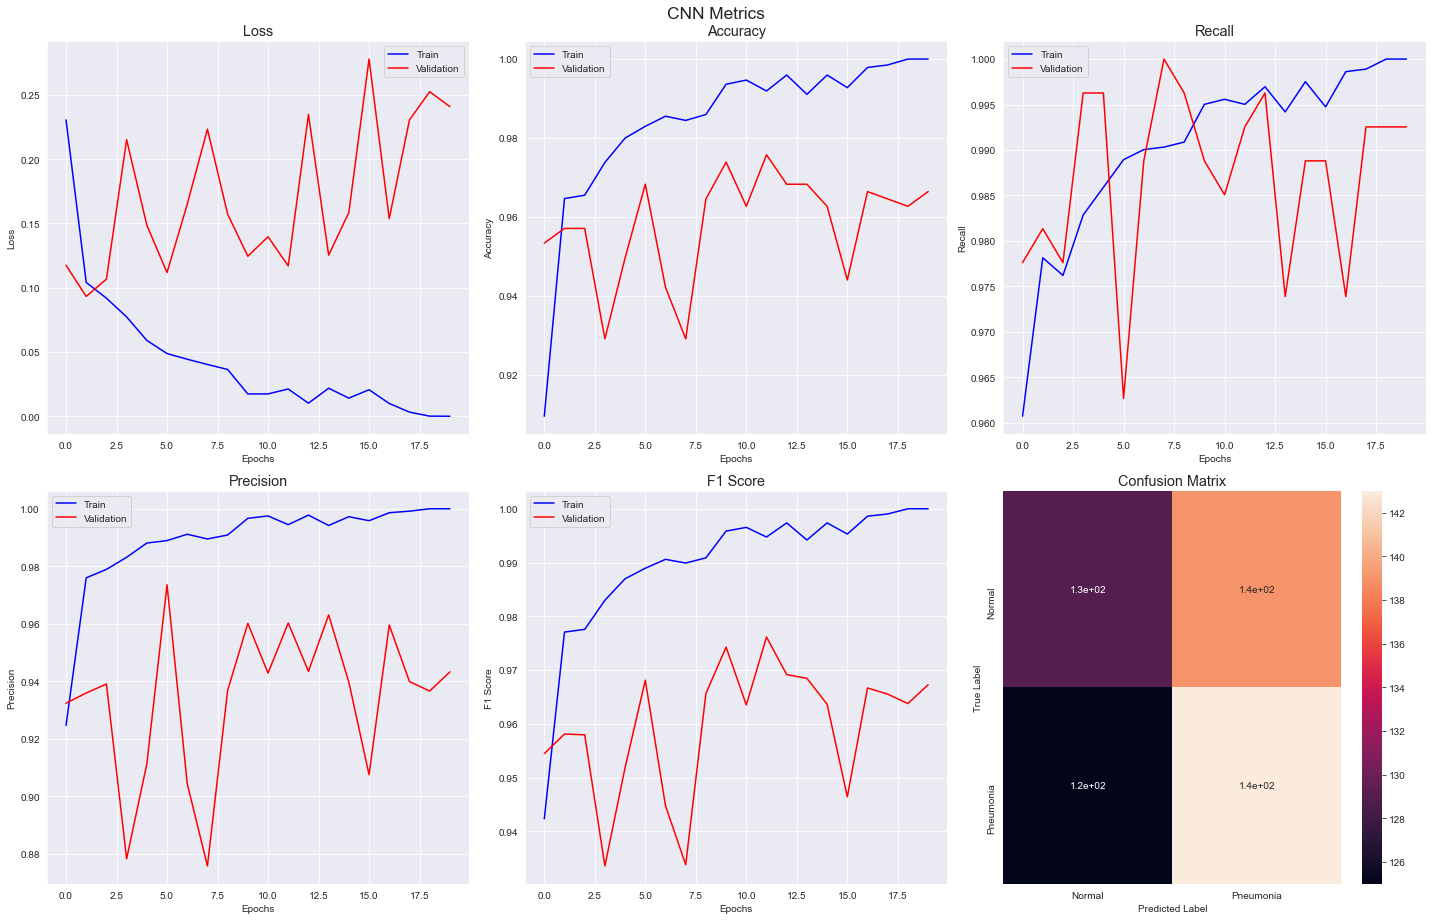

In [79]:
# Visualize

train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(cnn_history,
                                                            cnn,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'CNN', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch,
                               len(cnn.trainable_weights))

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'CNN', cnfs_mtrx)

While this model is an improvement from our previous one, it is still over predicting that images are classified as pneumonia.  Let’s try again with a similar convolutional neural network structure, but this time, we will include dropout layers as well as some L2 regularization.

## Model 3

Next, let’s utilize a similar structure as above, but with the inclusion of dropout layers and L2 regularization in our convolutional layers.  

In [80]:
# Add in drop out layers + regularilization

cnn_reg = Sequential()

cnn_reg.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))

cnn_reg.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))

cnn_reg.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))


cnn_reg.add(layers.Conv2D(20, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))

cnn_reg.add(layers.Flatten())

cnn_reg.add(layers.Dense(80, activation='relu'))
cnn_reg.add(layers.Dense(1, activation='sigmoid'))

cnn_reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)       

In [81]:
# Comiple Model
cnn_reg.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 
                         tf.keras.metrics.Recall(), 
                         tf.keras.metrics.Precision()])

In [82]:
start_time = time.time()

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=8)

# Train Model
cnn_reg_history = cnn_reg.fit(train_generator,
                              epochs=40,
                              validation_data = val_generator,
                              callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 86s 147ms/step - loss: 0.4958 - accuracy: 0.8526 - recall_3: 0.9555 - precision_3: 0.8668 - val_loss: 0.3888 - val_accuracy: 0.9216 - val_recall_3: 0.8955 - val_precision_3: 0.9449
Epoch 2/40
587/587 [==============================] - 86s 146ms/step - loss: 0.2540 - accuracy: 0.9289 - recall_3: 0.9574 - precision_3: 0.9506 - val_loss: 0.3053 - val_accuracy: 0.8955 - val_recall_3: 0.9925 - val_precision_3: 0.8313
Epoch 3/40
587/587 [==============================] - 85s 146ms/step - loss: 0.2127 - accuracy: 0.9370 - recall_3: 0.9618 - precision_3: 0.9565 - val_loss: 0.1612 - val_accuracy: 0.9552 - val_recall_3: 0.9552 - val_precision_3: 0.9552
Epoch 4/40
587/587 [==============================] - 86s 147ms/step - loss: 0.1773 - accuracy: 0.9502 - recall_3: 0.9698 - precision_3: 0.9656 - val_loss: 0.1902 - val_accuracy: 0.9384 - val_recall_3: 0.8843 - val_precision_3: 0.9916
Epoch 5/40
587/587 [==============================] - 86s 14

In [277]:
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(cnn_reg_history,
                                                            cnn_reg,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'CNN with Reg', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch,
                               len(cnn_reg.trainable_weights))

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'CNN with Regularization', cnfs_mtrx)

TypeError: record_all() takes 6 positional arguments but 7 were given

This model ran for the longest amount of epochs so far!  We can see an improvement based on our confusion matrix.  The number of true negatives (in this case, when the model correctly predicts a normal x-ray), has increased from the previous model. 

### Model 4

Before we move onto comparing all our models and choosing a final model to evaluate, let’s explore a model with transfer learning.  Keras offers a wide variety of models (see [Keras Applications](https://keras.io/api/applications/) for a full list). We will be using the VGG19 model.  

We will instantiate the model, build the rest of the structure, and freeze the VGG19 base before compiling and fitting.   

In [84]:
# Instantiate the VGG19 model
cnn_base = tf.keras.applications.VGG19(weights='imagenet',
                                       include_top=False,
                                       input_shape=(150,150,3),
                                       pooling='max')

# View the structure of the model
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [85]:
# Build the model
transfer_model = Sequential()

# Use VGG19 as base
transfer_model.add(cnn_base)
transfer_model.add(layers.Flatten())

# Two additional layers
transfer_model.add(layers.Dense(82, activation='relu'))
transfer_model.add(layers.Dens(64, activation='relu'))

# Output layer
transfer_model.add(layers.Dense(1, activation='sigmoid'))

transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 132)               67716     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 133       
Total params: 20,092,233
Trainable params: 20,092,233
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Look at the layers in our model + whether or not they are trainable
for layer in transfer_model.layers:
    print(layer.name, layer.trainable)
    
print('Number of trainable weights: ', len(transfer_model.trainable_weights))

vgg19 True
flatten_2 True
dense_12 True
dense_13 True
Number of trainable weights:  36


In [87]:
# Freeze the 'cnn base' layer
cnn_base.trainable = False

# Sanity Check
for layer in transfer_model.layers:
    print(layer.name, layer.trainable)
    
print('Number of trainable weights: ', len(transfer_model.trainable_weights))

vgg19 False
flatten_2 True
dense_12 True
dense_13 True
Number of trainable weights:  4


In [88]:
start_time = time.time()

# Comiple Model
transfer_model.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy', 
                                tf.keras.metrics.Recall(), 
                                tf.keras.metrics.Precision()])

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=8)

# Train Model
transfer_model_history = transfer_model.fit(train_generator,
                                            epochs=40,
                                            validation_data = val_generator,
                                            callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 287s 489ms/step - loss: 0.1875 - accuracy: 0.9284 - recall_4: 0.9657 - precision_4: 0.9427 - val_loss: 0.1637 - val_accuracy: 0.9310 - val_recall_4: 0.9776 - val_precision_4: 0.8942
Epoch 2/40
587/587 [==============================] - 288s 490ms/step - loss: 0.1213 - accuracy: 0.9555 - recall_4: 0.9734 - precision_4: 0.9689 - val_loss: 0.6116 - val_accuracy: 0.7556 - val_recall_4: 0.9963 - val_precision_4: 0.6725
Epoch 3/40
587/587 [==============================] - 288s 490ms/step - loss: 0.1045 - accuracy: 0.9598 - recall_4: 0.9757 - precision_4: 0.9722 - val_loss: 0.1017 - val_accuracy: 0.9571 - val_recall_4: 0.9701 - val_precision_4: 0.9455
Epoch 4/40
587/587 [==============================] - 287s 490ms/step - loss: 0.0961 - accuracy: 0.9649 - recall_4: 0.9790 - precision_4: 0.9755 - val_loss: 0.0958 - val_accuracy: 0.9664 - val_recall_4: 0.9813 - val_precision_4: 0.9529
Epoch 5/40
587/587 [==============================] - 28

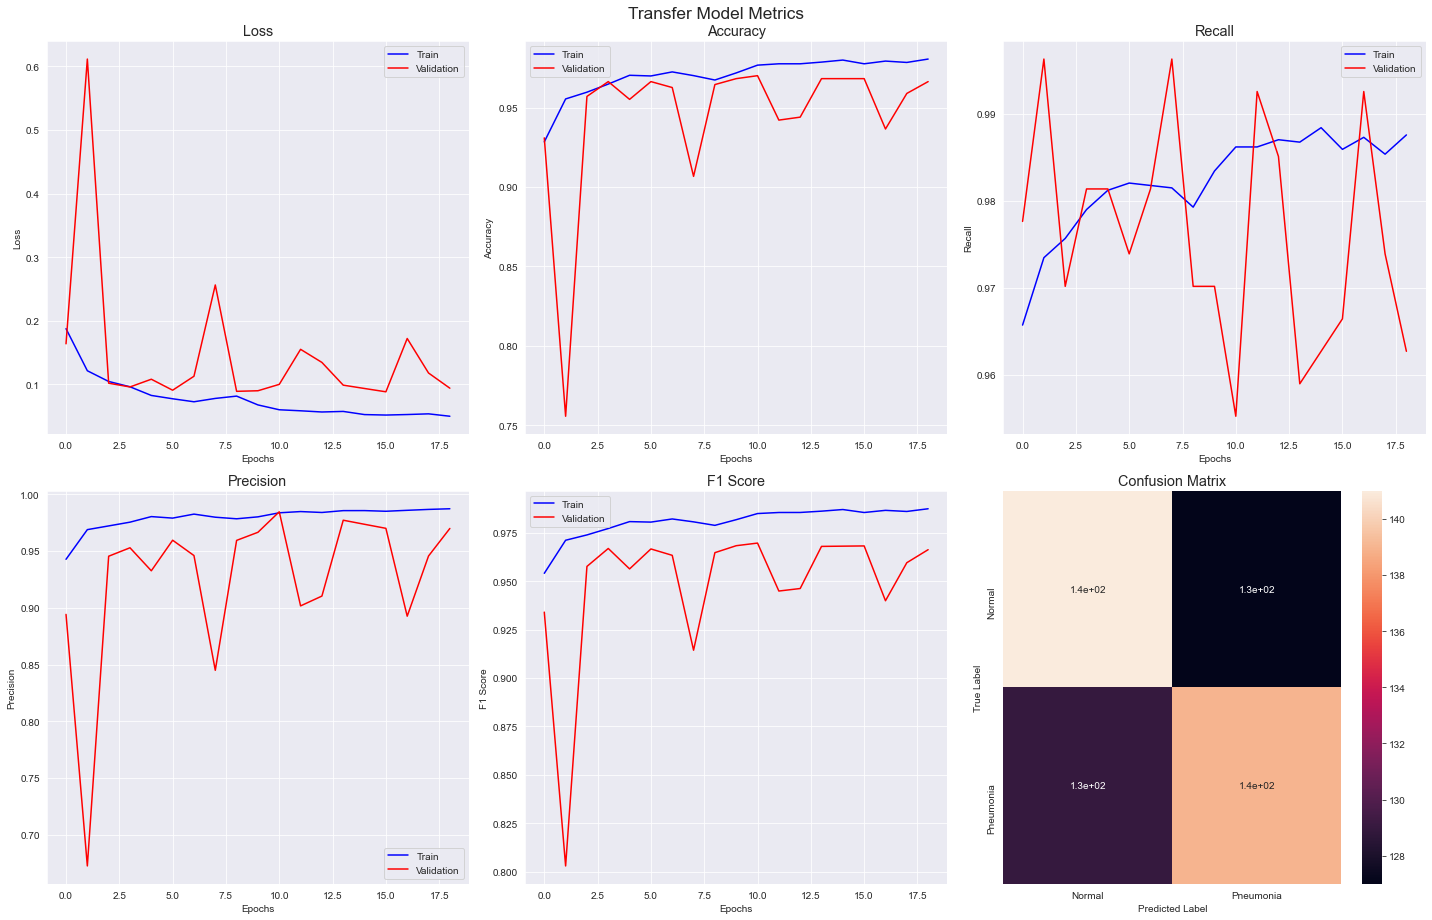

In [89]:
# Visualize
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(transfer_model_history,
                                                            transfer_model,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'Transfer', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch,
                               len(transfer_model.trainable_weights))

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Transfer Model', cnfs_mtrx)

We can see that this model is also over predicting pneumonia. Let's take a look at the final metrics for all our models side-by-side.

## All Model Comparison

Let's choose the most performant model!

In [90]:
import pandas as pd
df = pd.DataFrame.from_dict(all_model_metrics, orient='columns')
df.set_index('Model', inplace=True)

In [91]:
df

,Loss,Accuracy,Recall,Precision,F1 Score,Computation Time per Epoch,Confusion Matrix
Model,,,,,,,
Baseline Model,0.394095,0.941176,0.983607,0.895522,0.937500,1,"[[68, 7], [1, 60]]"
Baseline 75,0.694550,0.495098,1.000000,0.495098,0.662295,3,"[[0, 206], [0, 202]]"
CNN,0.240868,0.966418,0.992537,0.943262,0.967273,144,"[[129, 139], [125, 143]]"
CNN with Reg,0.099101,0.983209,0.985075,0.981413,0.983240,89,"[[135, 133], [132, 136]]"
Transfer,0.093854,0.966418,0.962687,0.969925,0.966292,305,"[[141, 127], [129, 139]]"


In [92]:
df['Confusion Matrix']

Model
Baseline Model          [[68, 7], [1, 60]]
Baseline 75           [[0, 206], [0, 202]]
CNN               [[129, 139], [125, 143]]
CNN with Reg      [[135, 133], [132, 136]]
Transfer          [[141, 127], [129, 139]]
Name: Confusion Matrix, dtype: object

In comparing all of our models, we can see that the top three performers are the CNN model, the CNN with Regularization, and the Transfer Learning model.  All three have accuracy, recall, precision, and F1 scores all above 90%.  That being said, the the Convolutional Neural Network with regularization is the most performant model. This model has the highest precision and F1 score.  We will move forward with this as our final model.

# Final Model Evaluation

- We will first evaluate our chosen final model with the holdout test set. We will visualize the test metrics along with the confusion matrix from this data.
- Visualize an image in each confusion matrix category (TN, FP, FN, TP)
- Visualizes how one of these images flows through the model
    - include a visual for the model structure
    - then a visual of the image in each activation layer of the model

In [97]:
# Evaluate the Final Model on the hold out test set
final_model_results = cnn_reg.evaluate(test_generator)
final_f1_score = 2 *((final_model_results[3] * final_model_results[2]) / (final_model_results[3] + final_model_results[2]))
final_model_results.append(final_f1_score)

78/78 [==============================] - 6s 81ms/step - loss: 0.7296 - accuracy: 0.7965 - recall_3: 0.9923 - precision_3: 0.7573


In [147]:
# Reshape the test labels to generate confusion matrix
test_labels_reshaped = test_labels[0].reshape(test_labels[0].shape[0],1)

for i in range(1,78):
    test_labels_reshaped = np.concatenate((test_labels_reshaped, test_labels[i].reshape(test_labels[i].shape[0], -1)))

# Build the confusion matrix
final_predictions = np.where(cnn_reg.predict(test_generator) >= 0.5, 1,0)
final_cnfs_mtrx = confusion_matrix(test_labels_reshaped, final_predictions)

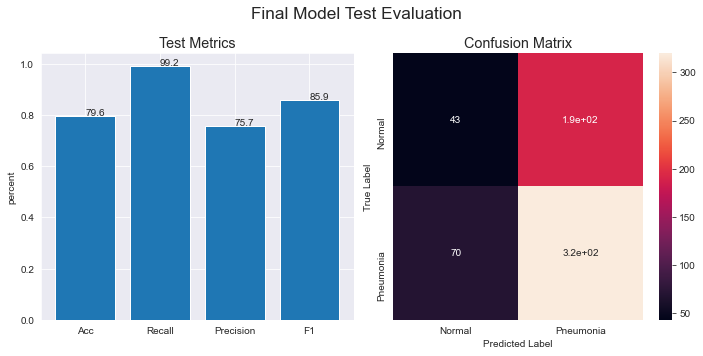

In [119]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# Plot Final Model Metrics
x = ['Acc', 'Recall', 'Precision', 'F1']
y = final_model_results[1:]
ax[0].bar(x,y)
ax[0].set_title('Test Metrics', fontsize='x-large')
ax[0].set_ylabel('percent')
ax[0].grid('True')

for i in range(len(x)):
    ax[0].text(i, y[i], round(y[i]*100,1))

# Plot Confusion Matrix
sns.heatmap(final_cnfs_mtrx, annot=True, ax=ax[1])
ax[1].set_title('Confusion Matrix', fontsize='x-large')
ax[1].set_xticklabels(['Normal', 'Pneumonia'])
ax[1].set_yticklabels(['Normal', 'Pneumonia'])
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.suptitle('Final Model Test Evaluation', fontsize='xx-large')
plt.tight_layout();

- Can see that model is performing worse on our test data than on our validation data which is slightly expected.
- With recall being so high and precision being so low and from the confusion matrix, we can see that the model is still overpredicting that patients have pneumonia even when they do not.  
- Let's take a look at some images in each confusion matrix category

In [163]:
# Create data frame with true labels + predicted label of test set in each column
true_labels = pd.DataFrame(test_labels_reshaped, columns=['True Label'])
pred_labels = pd.DataFrame(final_predictions, columns=['Predicted Label'])
predictions_df = pd.concat([true_labels, pred_labels], axis=1)

In [181]:
# Use np.select to create a third column labeling that prediction as TN, FP, FN, or TP 

conditions = [
    (predictions_df['True Label'] == 0) & (predictions_df['Predicted Label'] == 0),
    (predictions_df['True Label'] == 0) & (predictions_df['Predicted Label'] == 1),
    (predictions_df['True Label'] == 1) & (predictions_df['Predicted Label'] == 0),
    (predictions_df['True Label'] == 1) & (predictions_df['Predicted Label'] == 1)
]

choices = ['TN', 'FP', 'FN', 'TP']

predictions_df['t_f_p_n'] = np.select(conditions, choices)

In [224]:
predictions_df

,True Label,Predicted Label,t_f_p_n
0,0.0,0,TN
1,1.0,1,TP
2,1.0,1,TP
3,0.0,1,FP
4,1.0,0,FN
...,...,...,...
619,1.0,0,FN
620,1.0,1,TP
621,1.0,1,TP
622,1.0,0,FN


In [211]:
# Get a list of the index values for each label (FP, FN, TP, TN) -- so we can grab an image in each category to display
fp_index = predictions_df[predictions_df['t_f_p_n'] == 'FP'].index
fn_index = predictions_df[predictions_df['t_f_p_n'] == 'FN'].index
tp_index = predictions_df[predictions_df['t_f_p_n'] == 'TP'].index
tn_index = predictions_df[predictions_df['t_f_p_n'] == 'TN'].index

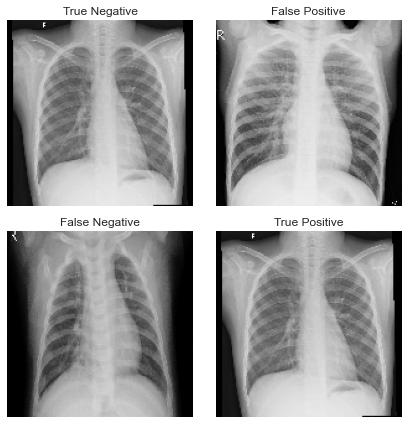

In [218]:
# Display images
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6,6))

ax[0,0].imshow(test_images[0][tn_index[0]])
ax[0,0].set_title('True Negative')
ax[0,0].axis('off')

ax[0,1].imshow(test_images[0][fp_index[0]])
ax[0,1].set_title('False Positive')
ax[0,1].axis('off')

ax[1,0].imshow(test_images[0][fn_index[0]])
ax[1,0].set_title('False Negative')
ax[1,0].axis('off')

ax[1,1].imshow(test_images[0][tn_index[0]])
ax[1,1].set_title('True Positive')
ax[1,1].axis('off')
plt.tight_layout();

- with an untrained eye of a profesional, it is hard to tell the difference between these images.  Let's take a closer look at how our model is processing these imagaes, using the False Positive image as an example, to both get a better understanding of how our model is functioning as well as to pinpoint any weaknesses in our model.

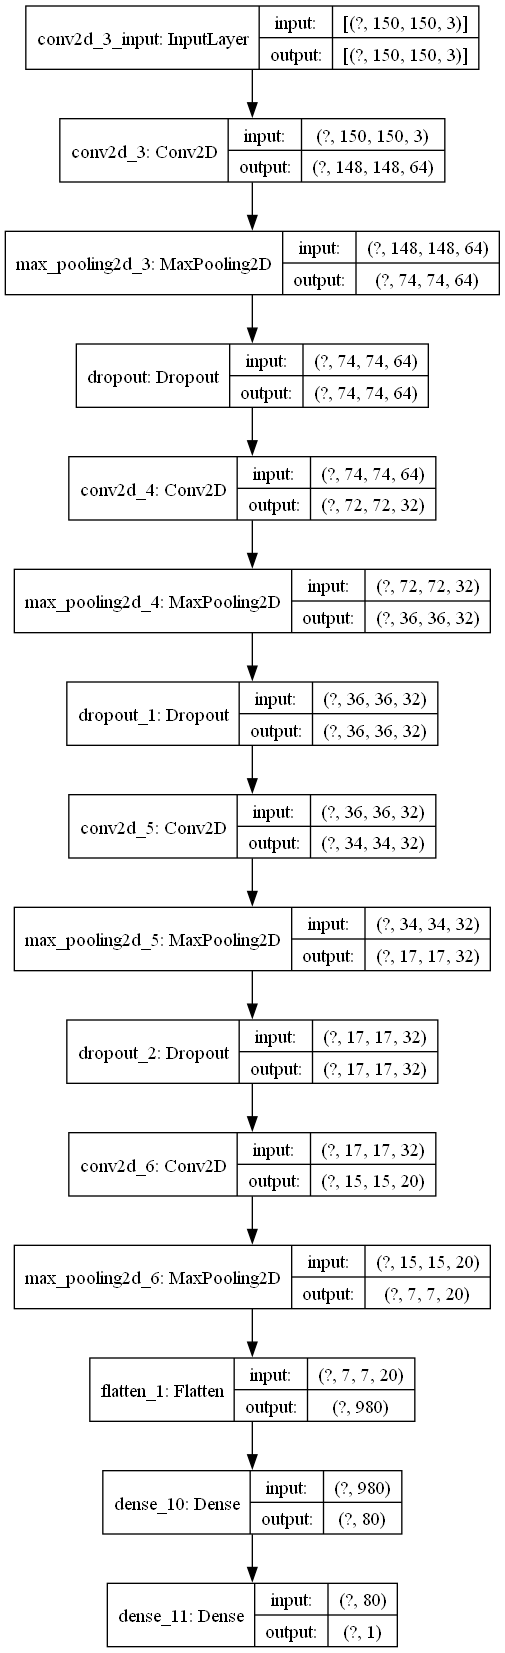

In [123]:
# Final model's architecture
from tensorflow.keras.utils import plot_model
plot_model(cnn_reg, show_shapes=True, show_layer_names=True)

In [127]:
# Get list of layer names (excluding the flatten layer on)
layer_outputs = [layer.output for layer in cnn_reg.layers[:11]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=cnn_reg.input, outputs=layer_outputs)

In [128]:
# inspect 3rd dimension of each activations output with summary
activation_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)       

- Can see that initial two layers output feature maps that have 64 channels each.
- Can visualize each of these channels individually by slicing the tensor along that axis

In [230]:
# Create appropriately shapped tensor of False Positive image
fp_img_tensor = np.expand_dims(test_images[0][fp_index[0]], axis=0)
fp_img_tensor.shape

(1, 150, 150, 3)

In [234]:
# Create an array for each activation layer
activations = activation_model.predict(fp_img_tensor)

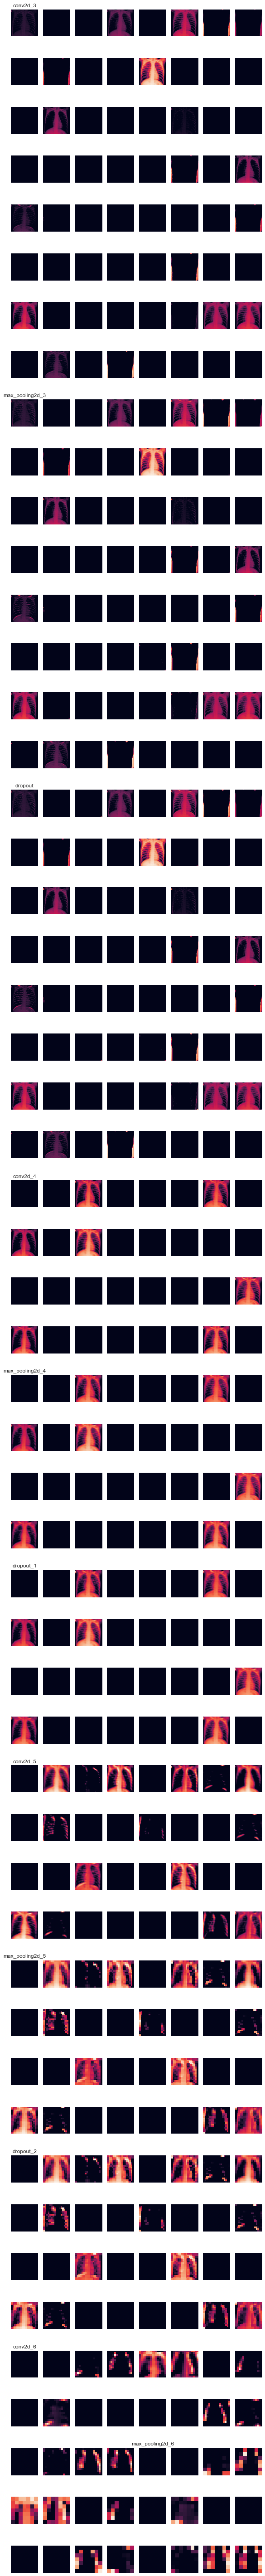

In [267]:
# Visualize each activation layer

# Retrieve layer names for section titles
layer_names = []
for layer in cnn_reg.layers[:11]:
    layer_names.append(layer.name)

# Set up ncol and nrows based off number of features
total_features = sum([a.shape[-1] for a in activations])
ncols = 8
nrows = math.ceil(total_features / ncols)

counter = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows*1.5))

# iterate through each layer
for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    
    # iterate through each channel
    for ch_indx in range(n_channels):
        row = counter // ncols
        col = counter % ncols
        ax = axes[row, col]
        
        channel_image = layer_activation[0,:,:, ch_indx]
        
        ax.imshow(channel_image)
        ax.axis('off')
        
        # set layer title if first image in layer
        if ch_indx == 0:
            ax.set_title(layer_names[layer_n])
        
        # increase counter
        counter += 1
plt.tight_layout();

- Big visual to take in all at once!  Can see that as expected, the model is abstracting the image as we go further along in the model, trying to pick up on more general trends
- Can see thatit is taking into consideration areas outside of lungs.  This is problematic as that part of the picture has no bearing on diagnosis, and can varry from x-ray to x-ray.  

## Evaluation Conclusion

 - good model --> ultimately it is capturing patients with pneumonia.  Is there room for improvement? Absolutely.  Would like to see less false positives and if possible less false negatives (as always).  
 - base on model evaluation -- recommend it as a screening process --> images that model predicts as pneumonia can be emailed to doctor for validation --> then patients can come make further steps to get care (due to high false positive rate).
 - no model is perfect (still seeing false negatives).

# Recommendations

1. Improve access to mobile x-rays so that this model, and technologies like it, can be leveraged to help communities in need.
2. Use the model as a screening process.
3. Look at how we can standarize x-ray process for more consistent results.

All models clearly over predicting pneumonia -- should have tried downsampling or using data augmentation to generate more normal x-ray image to level out imbalance in the target. 

Next Steps:
- See how similar models (or even smaller more light weight models) perform with more balanced data.
- multi-classification models (think Neural Africa's Neural Sight)